In [18]:
import numpy as np
import math as math

from graphtools import *
from vectools import * 

from scipy.linalg import expm
np.set_printoptions(linewidth=np.inf,precision=3, suppress=True)


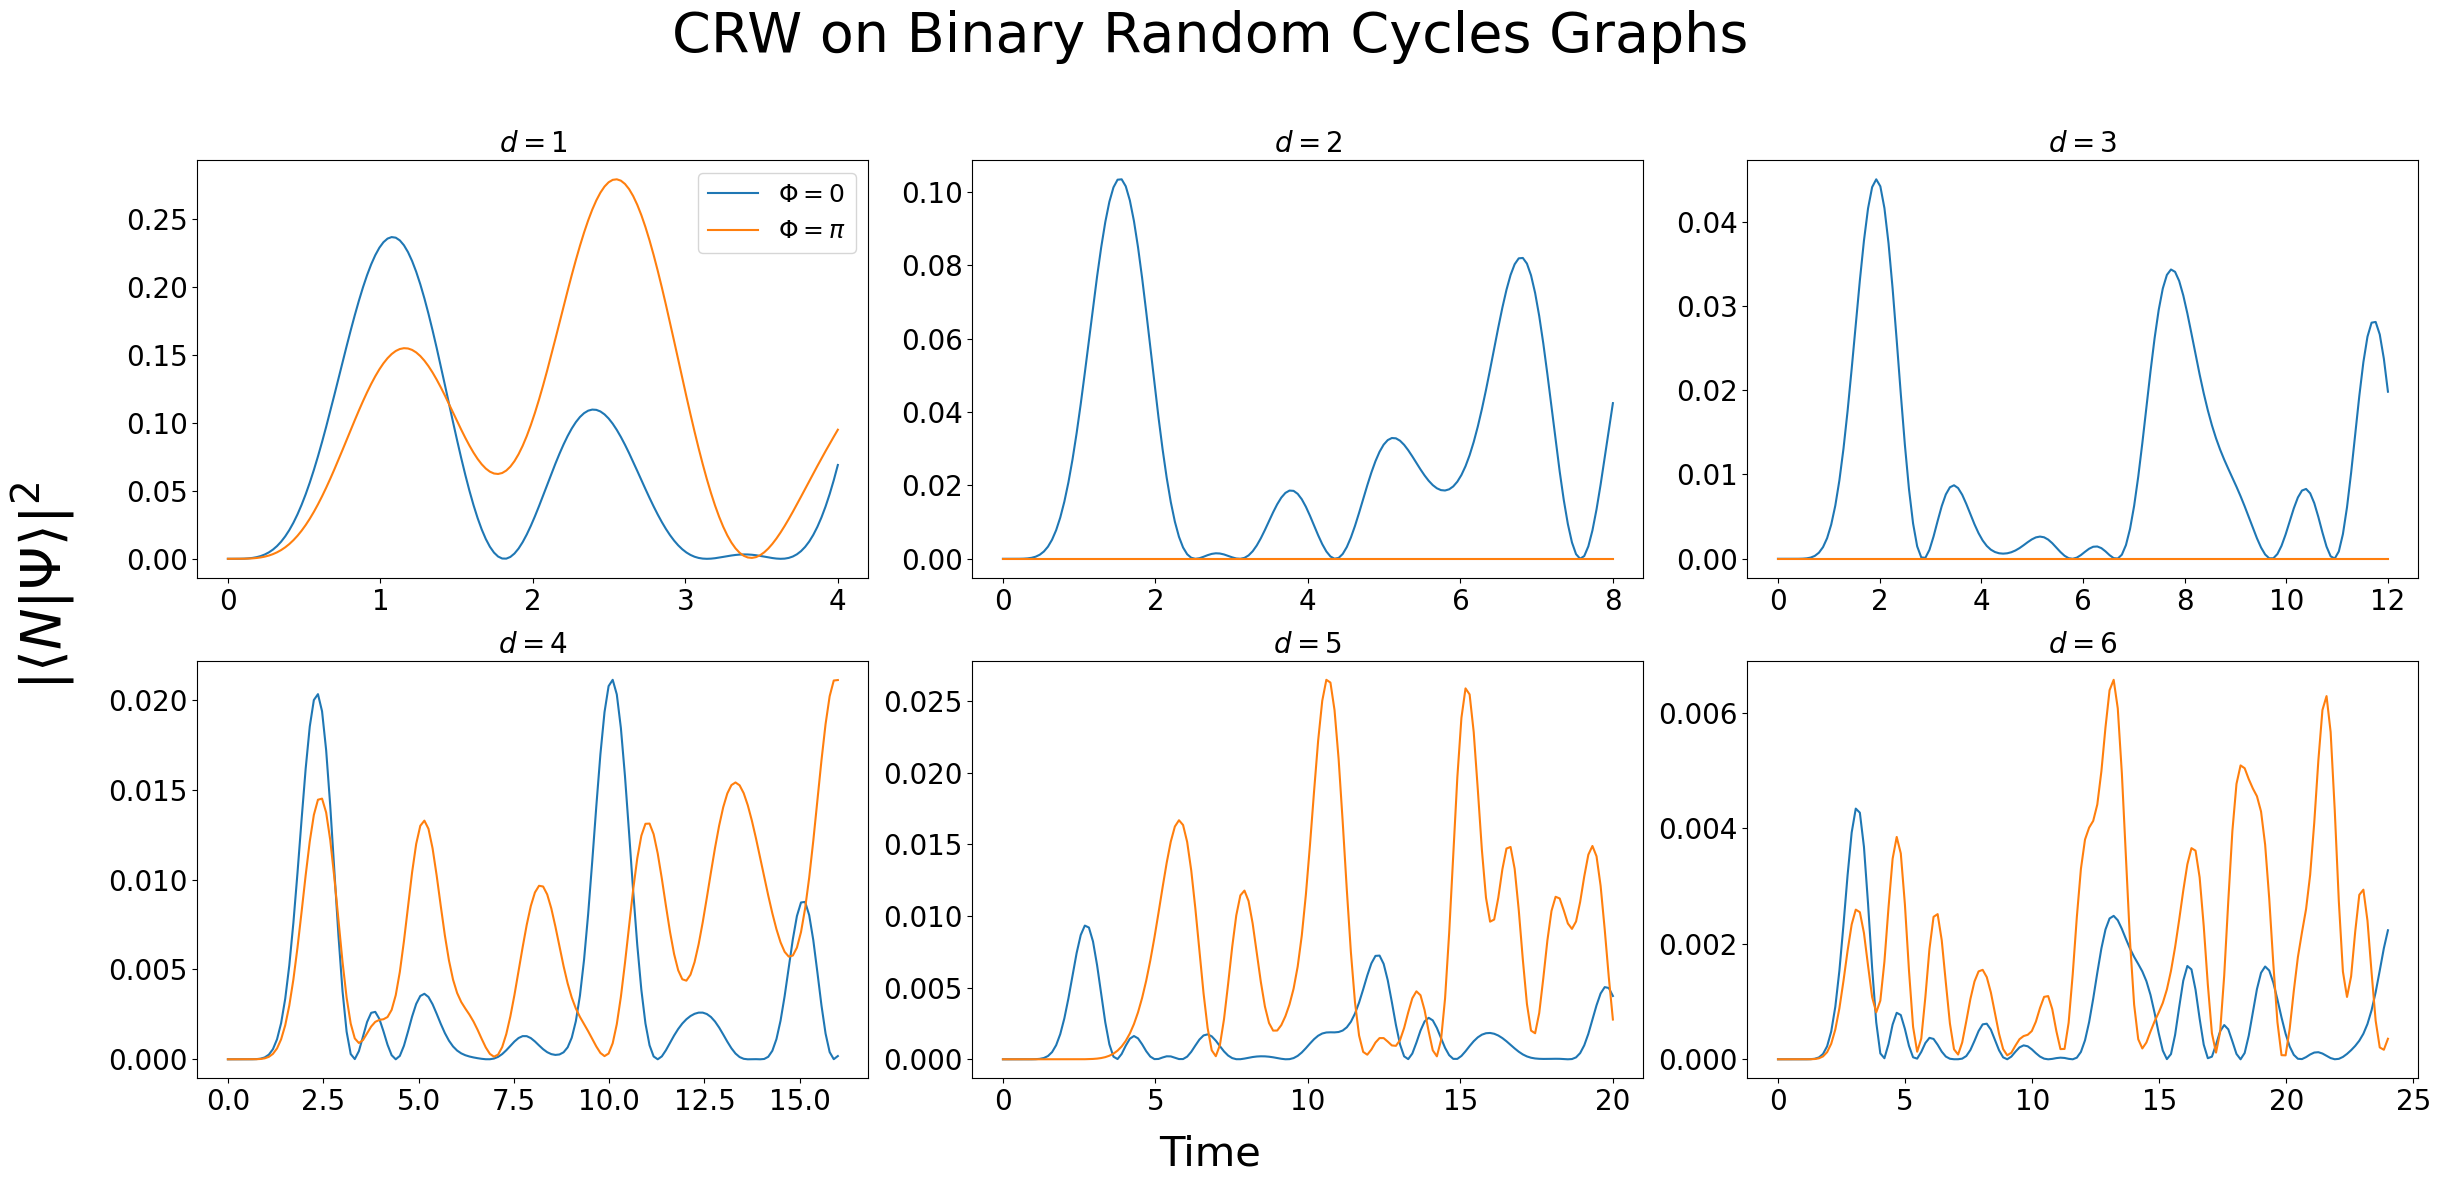

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Loop over each file and corresponding subplot
for i in range(1, 7):
    data = np.load(f"walkresults/2rc_{i}.npz")
    t = data["t"]
    prob_bare = data["prob_bare"]
    prob_flux = data["prob_flux"]
    
    ax = axes[i - 1]
    ax.plot(t, prob_bare, label=r"$\Phi = 0$")
    ax.plot(t, prob_flux, label=r"$\Phi = \pi$")

    if i==1:
        ax.legend(fontsize=18)
    ax.tick_params(axis="both",which="both",labelsize=20)
    ax.set_title(r"$d = %d$" % i,fontsize=20)

# Set a general title and axis labels
fig.suptitle("CRW on Binary Random Cycles Graphs", fontsize=40)
fig.supxlabel("Time", fontsize=30)
fig.supylabel(r"$|\langle N | \Psi \rangle|^2$", fontsize=40)

# Adjust layout so that the overall title and labels don't overlap the subplots
plt.tight_layout(rect=[.02, 0, 1, 0.95])
plt.show()

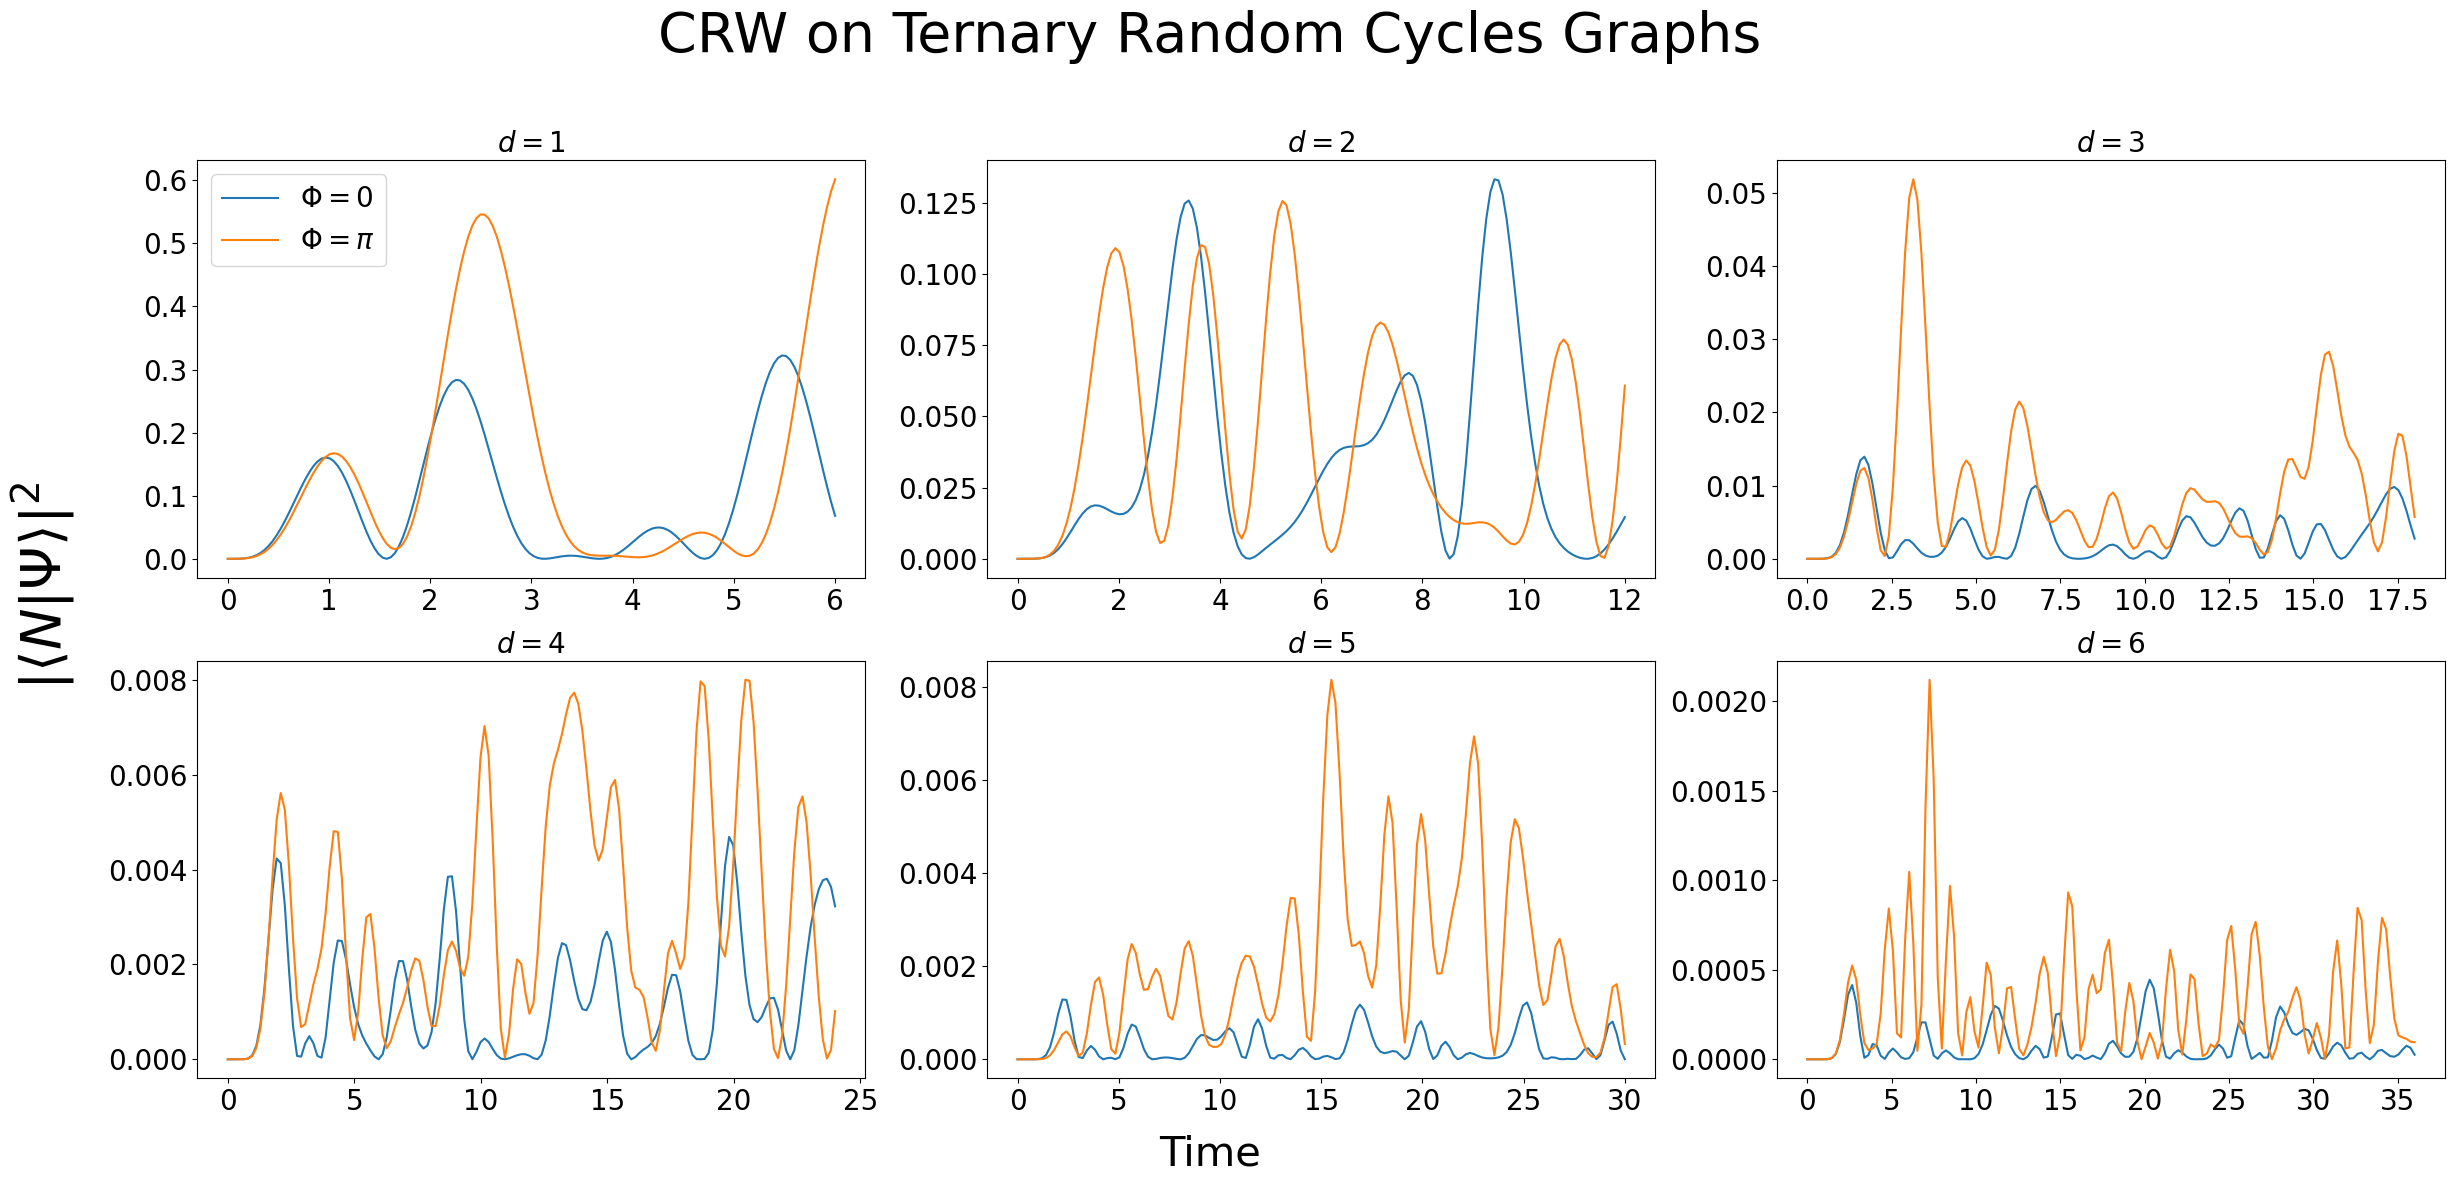

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(25, 12))
axes = axes.flatten()  # Flatten the 2D array for easy iteration

# Loop over each file and corresponding subplot
for i in range(1, 7):
    data = np.load(f"walkresults/3rc_{i}.npz")
    t = data["t"]
    prob_bare = data["prob_bare"]
    prob_flux = data["prob_flux"]
    
    ax = axes[i - 1]
    ax.plot(t, prob_bare, label=r"$\Phi = 0$")
    ax.plot(t, prob_flux, label=r"$\Phi = \pi$")
    #ax.set_xlabel("Time")
    if i==1:
        ax.legend(fontsize=20)
    #ax.set_ylabel(r"$|\langle N | \Psi \rangle|^2$",fontsize=20)
    ax.tick_params(axis="both",which="both",labelsize=20)
    ax.set_title(r"$d = %d$" % i,fontsize=20)

# Set a general title and axis labels
fig.suptitle("CRW on Ternary Random Cycles Graphs", fontsize=40)
fig.supxlabel("Time", fontsize=30)
fig.supylabel(r"$|\langle N | \Psi \rangle|^2$", fontsize=40)

# Adjust layout so that the overall title and labels don't overlap the subplots
plt.tight_layout(rect=[.02, 0, 1, 0.95])
plt.show()

In [21]:
p=2
i=1
AFB = 2 * np.pi / p

X = [p] * i
ftree = fluxedTree(X)
ftree.construct_fluxed()

rand = generate_random_cycle_graph(ftree)
rand.construct_fluxed()
rand.construct_adj()

# Obtain the Hamiltonians for both cases
bare_hamiltonian = rand.adj
fluxed_hamiltonian = rand.weighted_adj(AFB)

In [22]:
eigvals, eigvecs = np.linalg.eigh(fluxed_hamiltonian)

In [ ]:
prob_flux = [0]
prob_bare = [0]
psi_i = e_n(0, N)

psi_curr_bare = psi_curr_fluxed = psi_i

# Use tqdm to show progress for each time step
for time in t[1:]:
    psi_curr_bare = U_bare@psi_curr_bare
    psi_curr_fluxed = U_fluxed@psi_curr_fluxed
    prob_flux.append(np.abs(end.conj() @ psi_curr_fluxed)**2)
    prob_bare.append(np.abs(end.conj() @ psi_curr_bare)**2)